# PIPELINE: model 4, dataset v2(https://app.roboflow.com/sidsproject/back_stomach_2-used-pehn2-8iy1j/generate/preprocessing),different types of embeddings

## PIPELINE
### 1. load model face_detection
### 2. extract embeddings from dataset
### 3. retrieval to evaluate embeddings goodness
### 4. train model classification

## 1. load the model face_detection
Step 1 is the same for each pipeline, so we do it once at the beginning.

**Import dependencies**

In [1]:
%load_ext autoreload
%autoreload 2

from embeddings import EmbeddingBuilder
import os
import ipynbname

from retrieval import ImageRetrieval
from classifier import Classifier
import file_manager

project_dir = f"{os.getcwd().split('SIDS_revelation_project')[0]}SIDS_revelation_project"
image_dataset_path = f"{project_dir}/datasets/onback_onstomach_v2"

model_path = f"{project_dir}/models/4.weights/best.pt"

**Choose how to process the dataset:**
1. "extract_features":                     extracting features and labels
2. "extract_features_imageswithinference": extracting features and labels and saving predicted images with bboxes
3. "load":                                  loading features and labels

In [2]:
emb_builder = EmbeddingBuilder(model_path, image_dataset_path, "load")


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 1506 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .csv----------------------------------------------------------------
Features loaded succesfully, in particular there are 1506 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 4 (YOLOv8)
Dataset: /home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project/datasets/onback_onstomach_v2
Dataset dimension: 1506
Dataset labels: {'baby_safe': 0, 'baby_unsafe': 1}
------------------------------------------------------------------------------------------


---
# EMBEDDING flag

---

## 2. Extract embeddings from dataset

**Create embeddings**

In [3]:
embeddings = emb_builder.embedding_flags()


Creation of flags features embedding------------------------------------------------------
1506 embedding created
------------------------------------------------------------------------------------------


In [4]:
embeddings.head()

,flag_eye1,flag_eye2,flag_nose,flag_mouth
0,0,0,0,0
1,1,1,1,1
2,0,0,0,0
3,1,1,1,1
4,1,1,1,1


## 3. Retrieval to evaluate embedding goodness

Precision at different k:-----------------------------------------------------------------


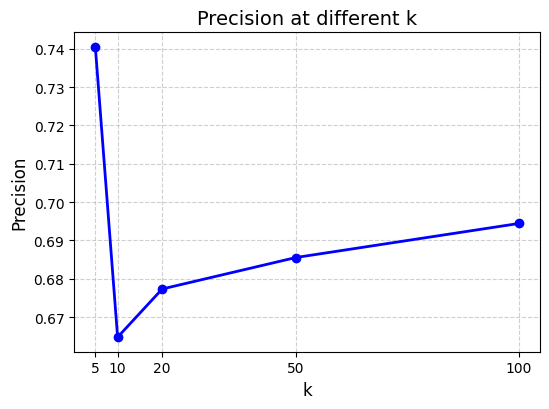


Recall at R-------------------------------------------------------------------------------
0.6558580010669358

Silhouette score--------------------------------------------------------------------------


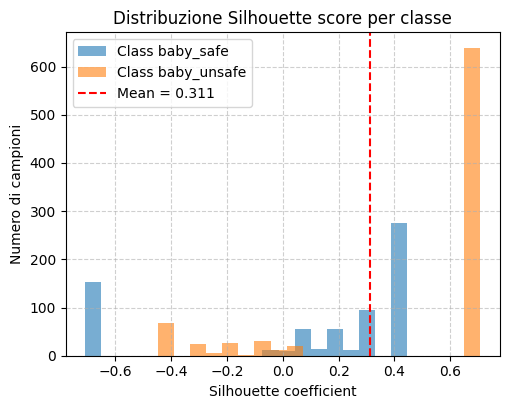


Embeddings distributions------------------------------------------------------------------


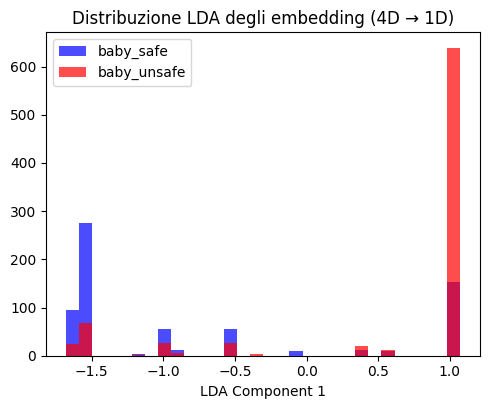

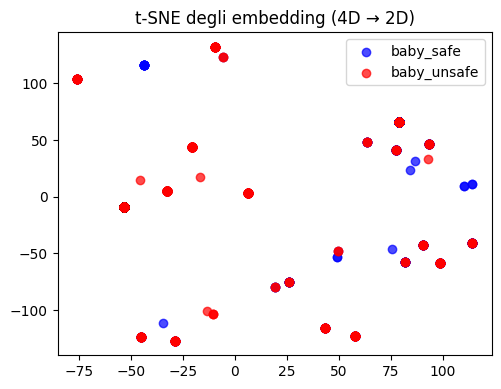

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


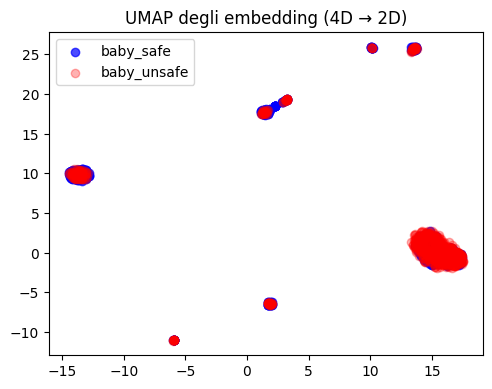

In [5]:
ret = ImageRetrieval(embeddings, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
ret.report("euclidean")

Precision at different k:-----------------------------------------------------------------


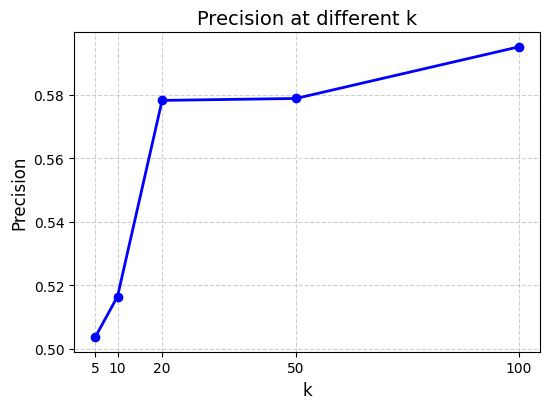


Recall at R-------------------------------------------------------------------------------
0.5754122273017442

Silhouette score--------------------------------------------------------------------------


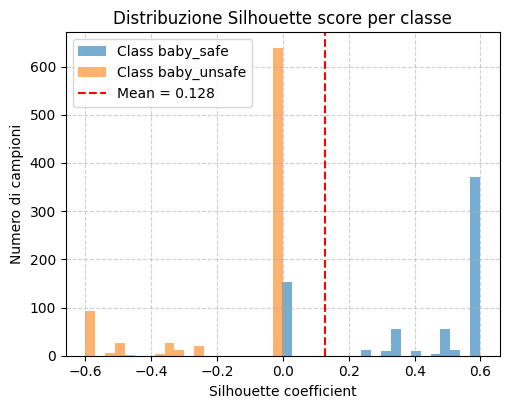


Embeddings distributions------------------------------------------------------------------


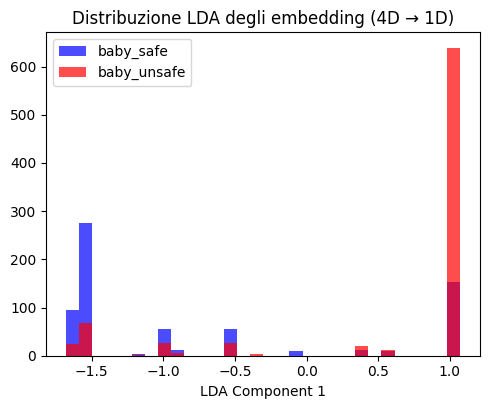

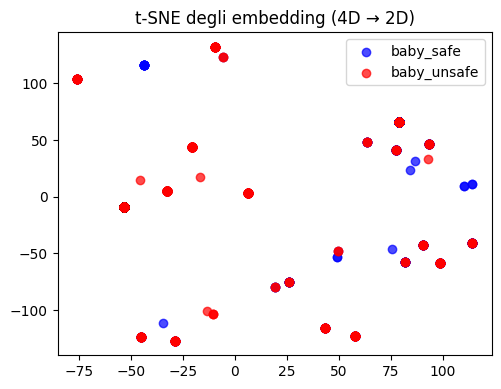

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


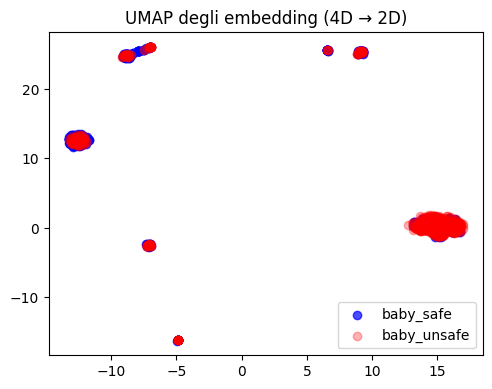

In [6]:
ret.report("cosine")

Precision at different k:-----------------------------------------------------------------


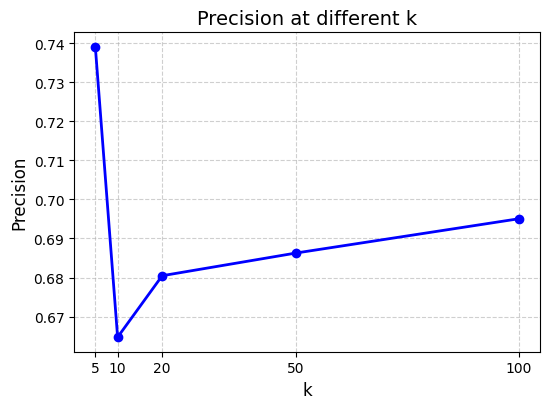


Recall at R-------------------------------------------------------------------------------
0.6502013355033254

Silhouette score--------------------------------------------------------------------------


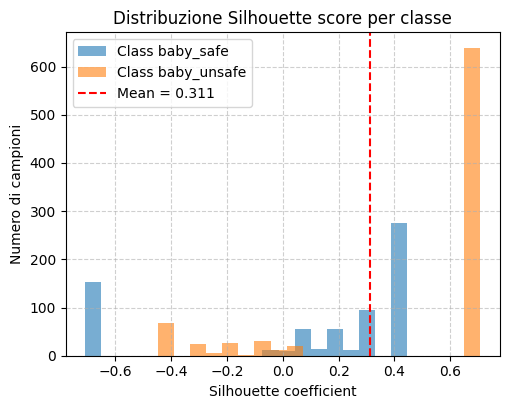


Embeddings distributions------------------------------------------------------------------


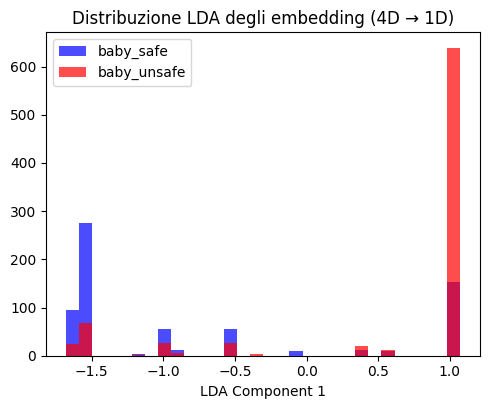

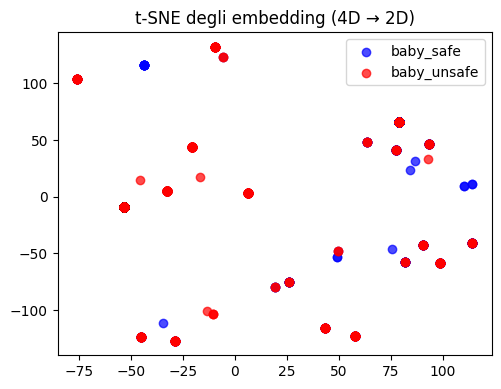

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


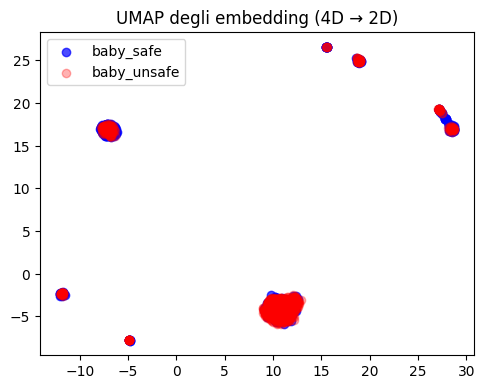

In [7]:
ret.report("minkowski")

## 4. Train model classification

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


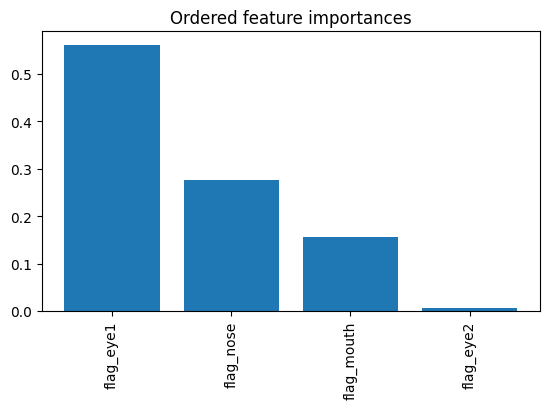

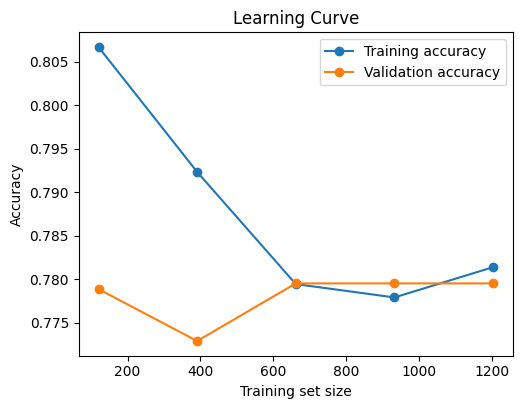


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.74      0.77      0.75       115
 baby_unsafe       0.86      0.83      0.84       187

    accuracy                           0.81       302
   macro avg       0.80      0.80      0.80       302
weighted avg       0.81      0.81      0.81       302

Confusion matrix---------------------------------------


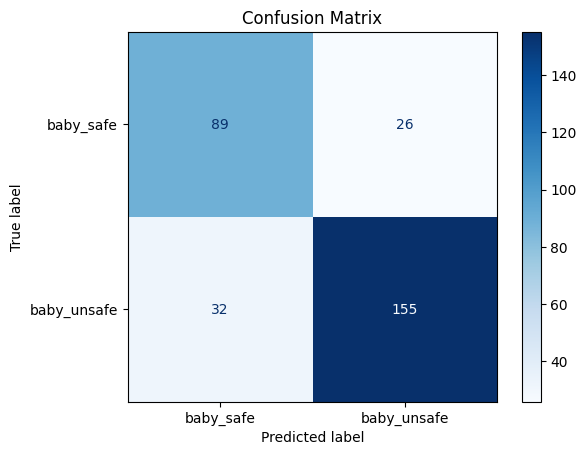

In [8]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs)
clf.random_forest()

---
# EMBEDDING all features

---

## 2. Extract embeddings from dataset

**Create embeddings**

In [9]:
embeddings = emb_builder.embedding_all_features()


Creation of all features embedding--------------------------------------------------------
1506 embedding created
------------------------------------------------------------------------------------------


In [10]:
embeddings.head()

,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,x_mouth,y_mouth,eye_distance,face_vertical_length,face_angle_vertical,face_angle_horizontal,symmetry_diff
0,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
1,1,1,1,1,0.747866,0.955937,0.746319,0.680452,0.709361,0.853581,0.650598,0.840860,0.275490,0.060125,122.830696,147.334481,0.085138
2,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
3,1,1,1,1,0.533123,0.143157,0.374687,0.148591,0.457184,0.163462,0.469082,0.201713,0.158529,0.040059,87.692268,154.811363,0.004185
4,1,1,1,1,0.859706,0.598094,0.846316,0.728694,0.827010,0.658031,0.788980,0.648129,0.131284,0.039298,104.018161,136.106213,0.002724


## 3. Retrieval to evaluate embedding goodness

Precision at different k:-----------------------------------------------------------------


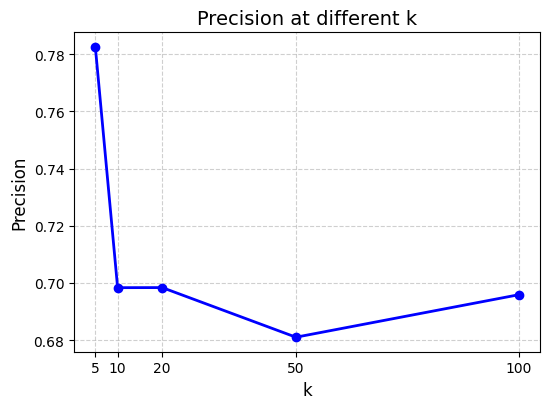


Recall at R-------------------------------------------------------------------------------
0.6126016574337287

Silhouette score--------------------------------------------------------------------------


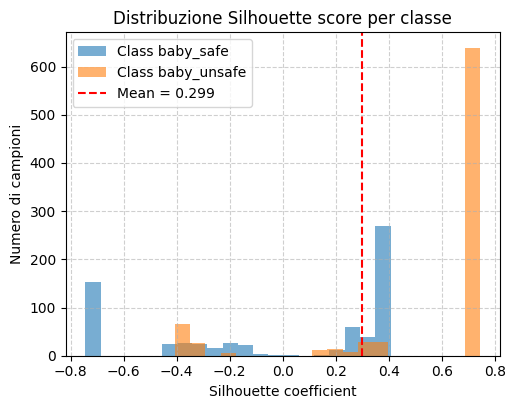


Embeddings distributions------------------------------------------------------------------


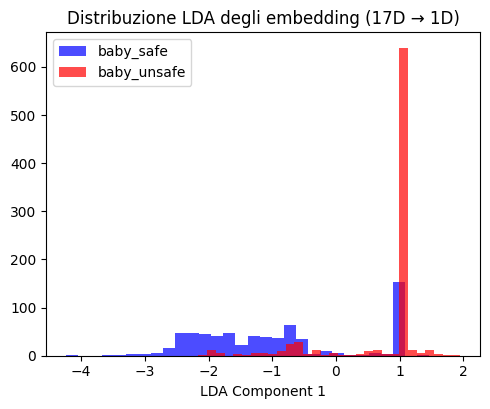

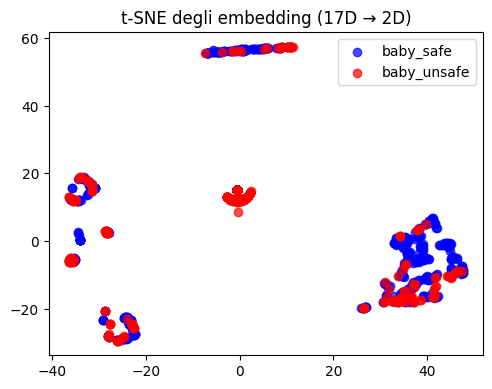

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


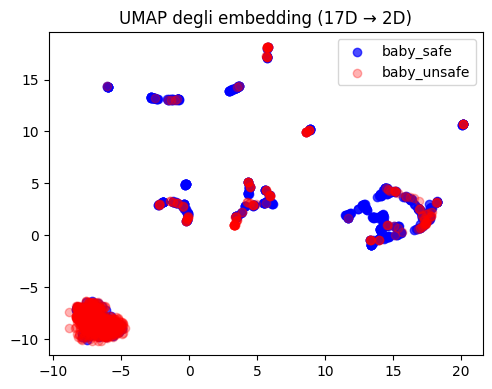

In [11]:
ret = ImageRetrieval( embeddings, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
ret.report("euclidean")

Precision at different k:-----------------------------------------------------------------


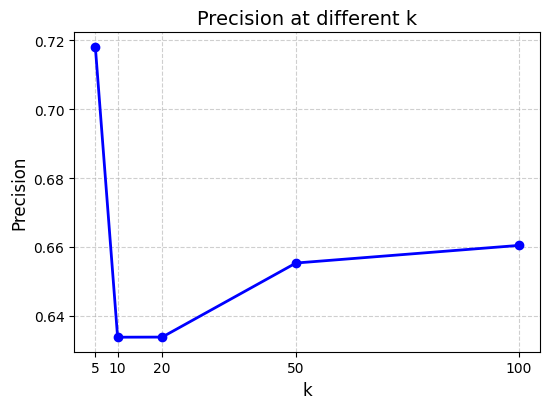


Recall at R-------------------------------------------------------------------------------
0.6158959434877811

Silhouette score--------------------------------------------------------------------------


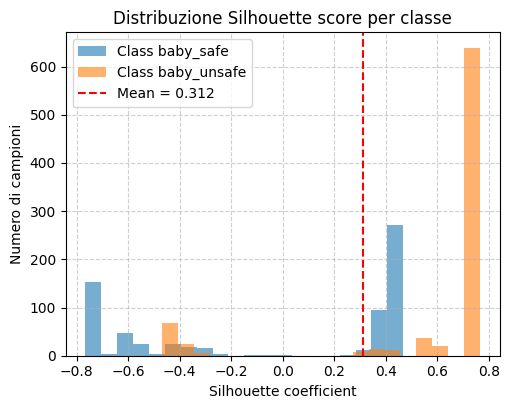


Embeddings distributions------------------------------------------------------------------


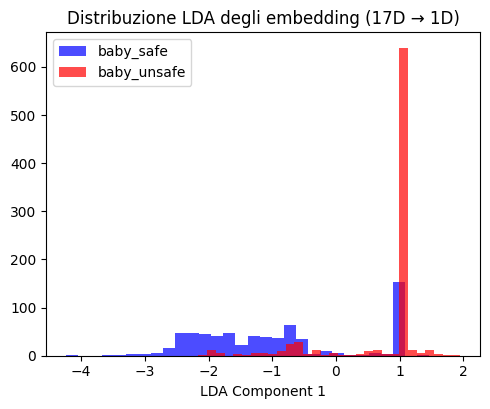

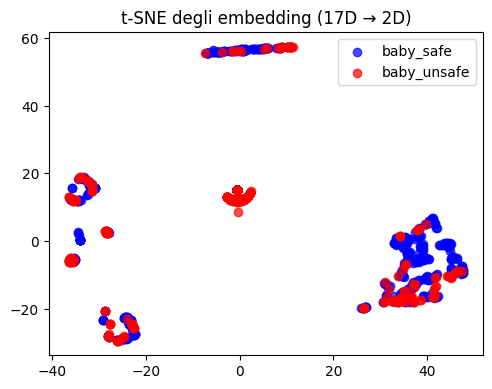

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


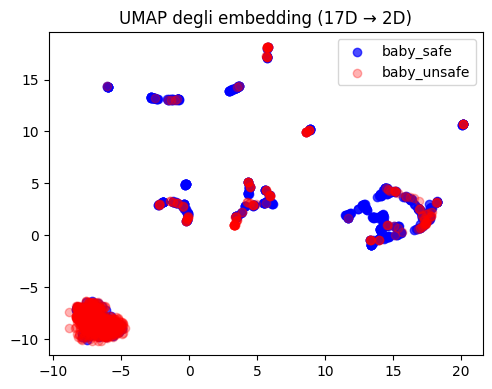

In [12]:
ret.report("cosine")

Precision at different k:-----------------------------------------------------------------


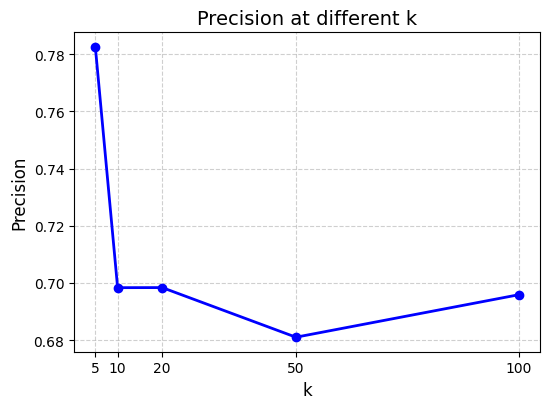


Recall at R-------------------------------------------------------------------------------
0.6126016574337287

Silhouette score--------------------------------------------------------------------------


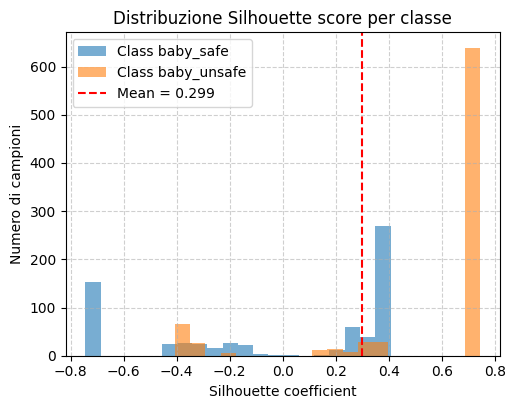


Embeddings distributions------------------------------------------------------------------


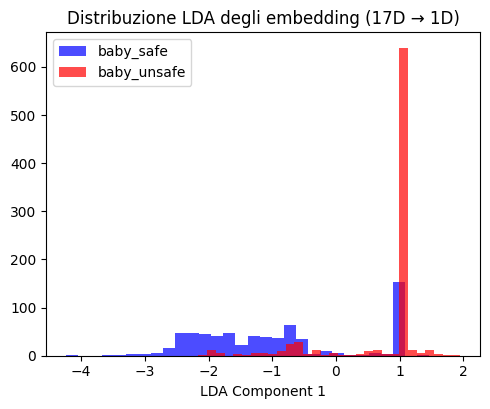

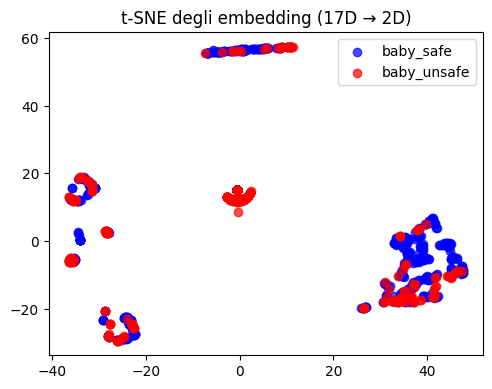

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


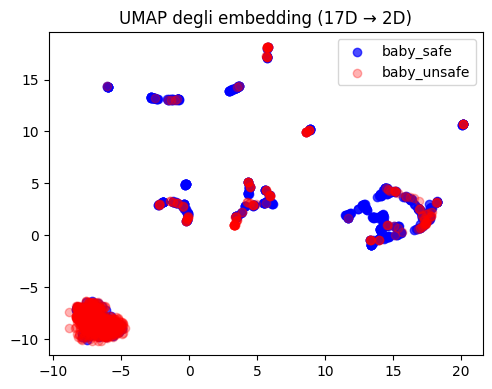

In [13]:
ret.report("minkowski")

## 4. Train model classification

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


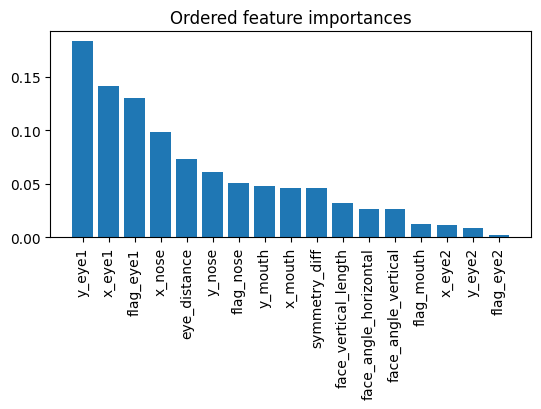

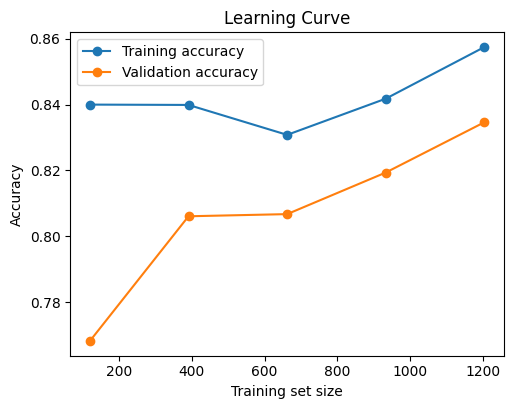


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.81      0.79      0.80       115
 baby_unsafe       0.87      0.89      0.88       187

    accuracy                           0.85       302
   macro avg       0.84      0.84      0.84       302
weighted avg       0.85      0.85      0.85       302

Confusion matrix---------------------------------------


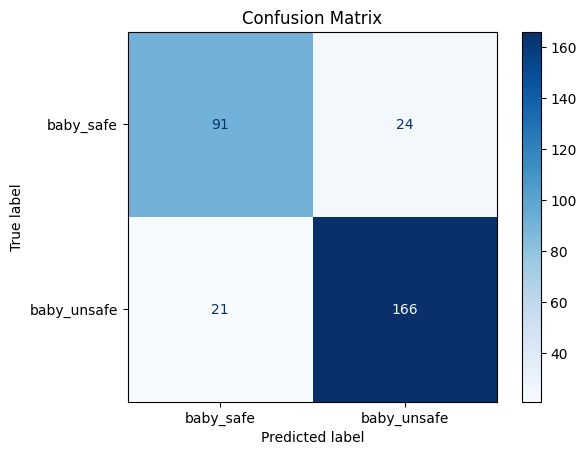

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


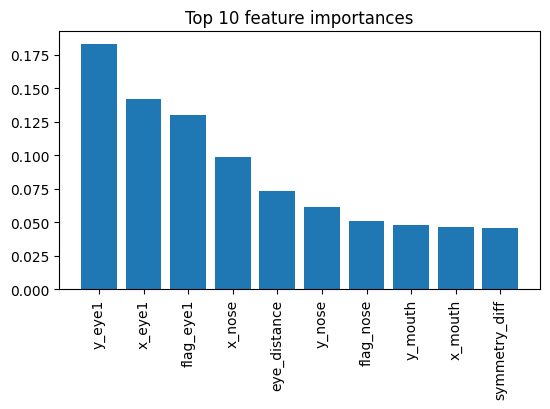

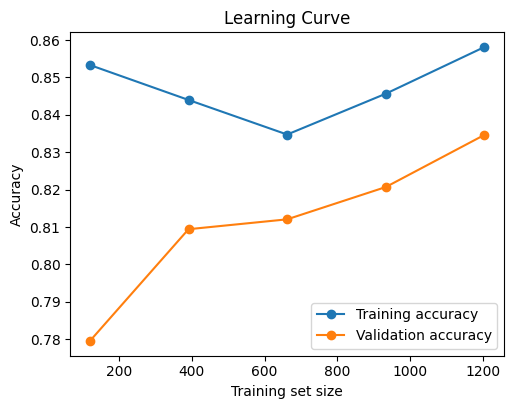


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.82      0.79      0.81       115
 baby_unsafe       0.87      0.89      0.88       187

    accuracy                           0.85       302
   macro avg       0.85      0.84      0.84       302
weighted avg       0.85      0.85      0.85       302

Confusion matrix---------------------------------------


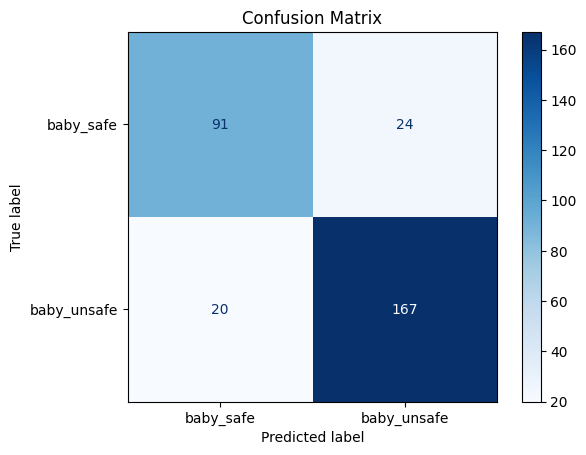

In [14]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs)
clf.random_forest()

---
# EMBEDDING all features normalized

---

## 2. Extract embeddings from dataset

**Create embeddings**

In [15]:
embeddings = emb_builder.embedding_all_features_norm()


Creation of all features embedding--------------------------------------------------------
FINISHED: 1506 embedding created


In [16]:
embeddings.head()

,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,...,x_mouth_norm,y_mouth_norm,eye_distance,eye_distance_norm,face_vertical_length,face_vertical_length_norm,face_angle_vertical,face_angle_horizontal,symmetry_diff,head_ration
0,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-7.346064,-3.560087,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.292278
1,1,1,1,1,0.747866,0.955937,0.746319,0.680452,0.709361,0.853581,...,0.814792,1.258686,0.275490,0.685025,0.060125,0.090708,122.830696,147.334481,0.085138,1.648186
2,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.126908,-1.251334,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.728926
3,1,1,1,1,0.533123,0.143157,0.374687,0.148591,0.457184,0.163462,...,1.014402,1.536646,0.158529,0.397289,0.040059,0.172300,87.692268,154.811363,0.004185,0.582652
4,1,1,1,1,0.859706,0.598094,0.846316,0.728694,0.827010,0.658031,...,0.911147,0.985550,0.131284,0.496643,0.039298,0.121073,104.018161,136.106213,0.002724,1.227875


## 3. Retrieval to evaluate embedding goodness

Precision at different k:-----------------------------------------------------------------


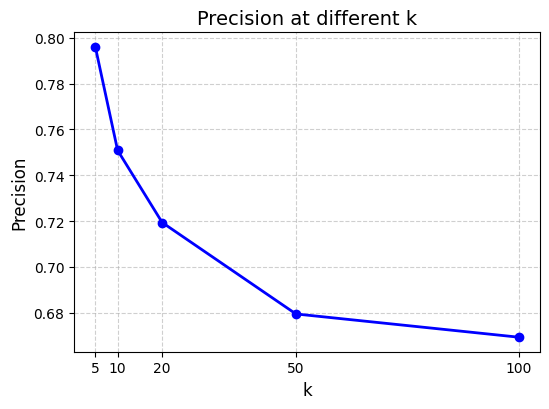


Recall at R-------------------------------------------------------------------------------
0.6024782449930813

Silhouette score--------------------------------------------------------------------------


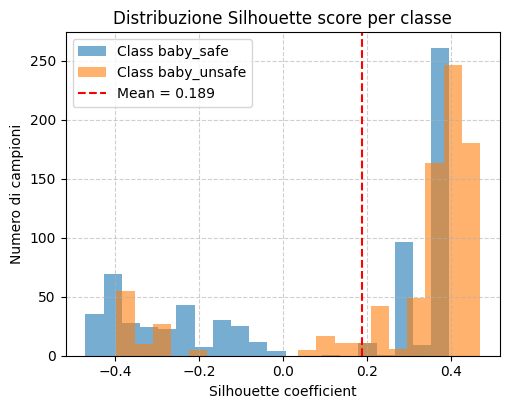


Embeddings distributions------------------------------------------------------------------


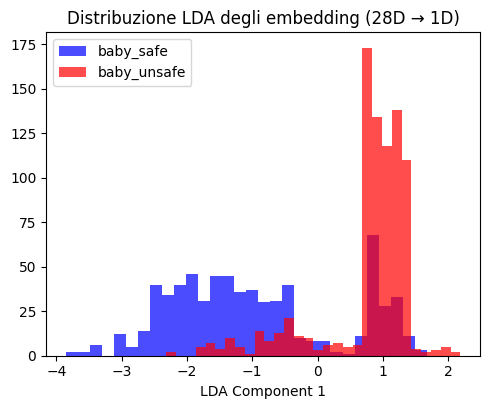

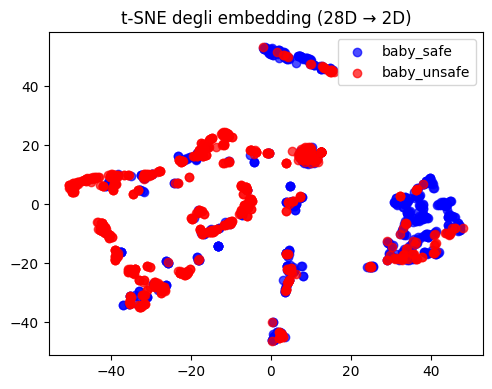

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


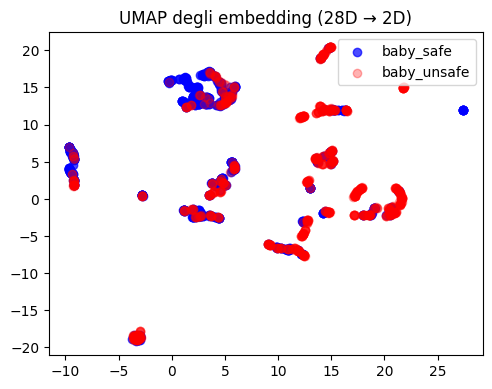

In [17]:
ret = ImageRetrieval( embeddings, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
ret.report("euclidean")

Precision at different k:-----------------------------------------------------------------


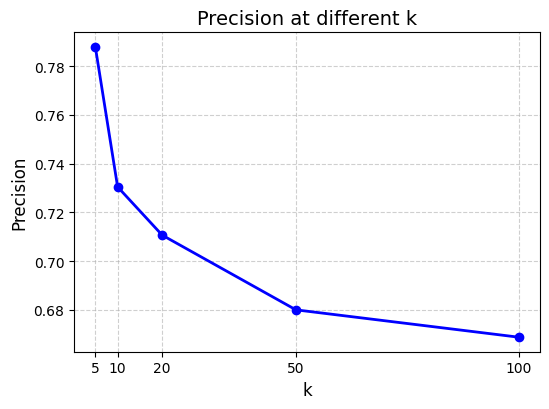


Recall at R-------------------------------------------------------------------------------
0.6024585106354623

Silhouette score--------------------------------------------------------------------------


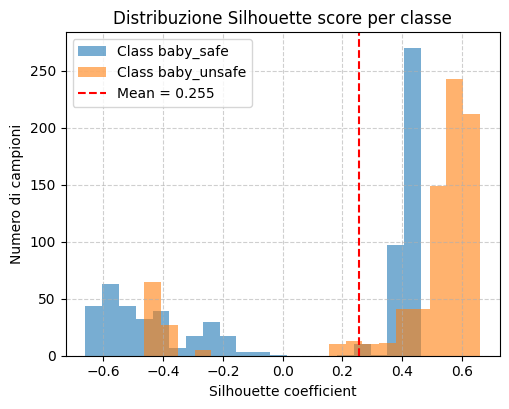


Embeddings distributions------------------------------------------------------------------


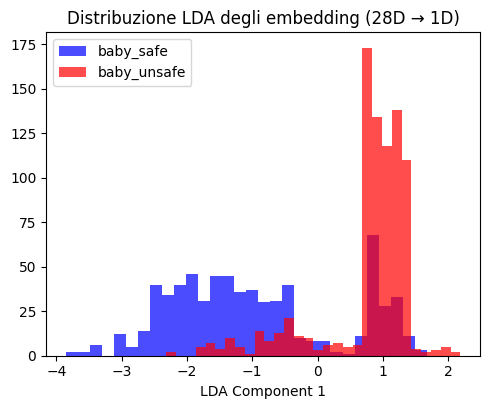

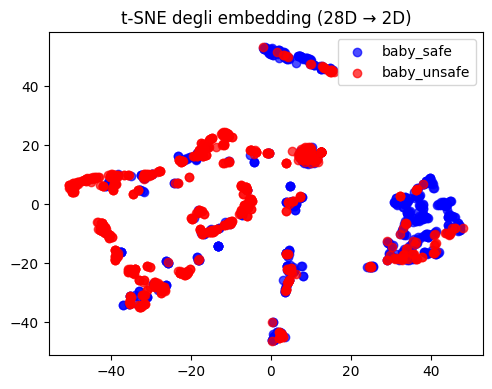

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


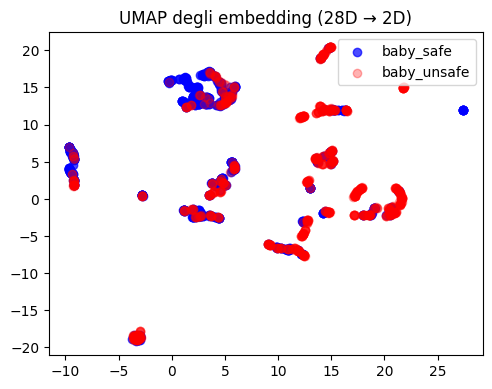

In [18]:
ret.report("cosine")

Precision at different k:-----------------------------------------------------------------


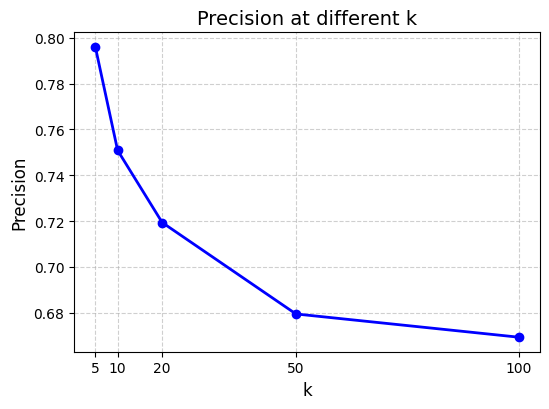


Recall at R-------------------------------------------------------------------------------
0.6024782449930813

Silhouette score--------------------------------------------------------------------------


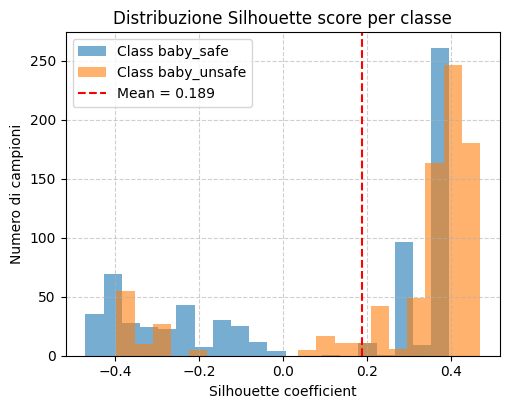


Embeddings distributions------------------------------------------------------------------


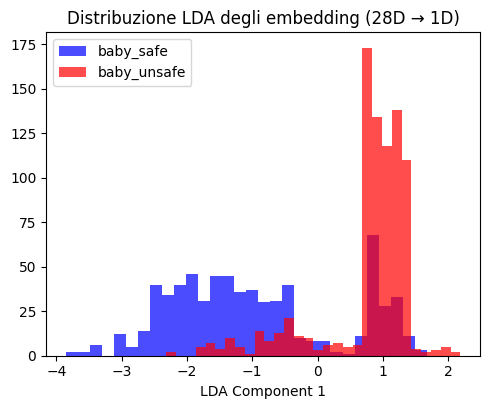

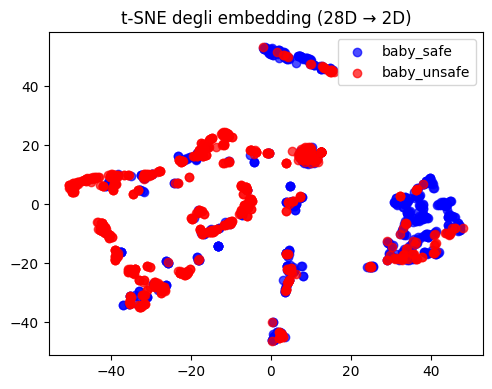

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


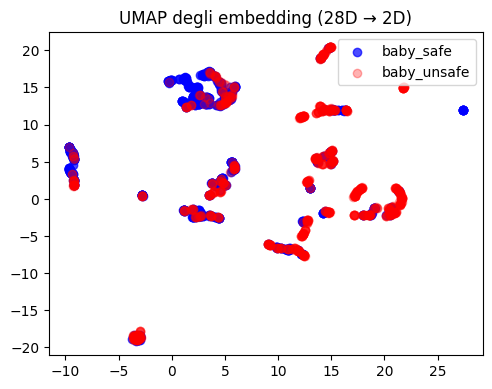

In [19]:
ret.report("minkowski")

## 4. Train model classification

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


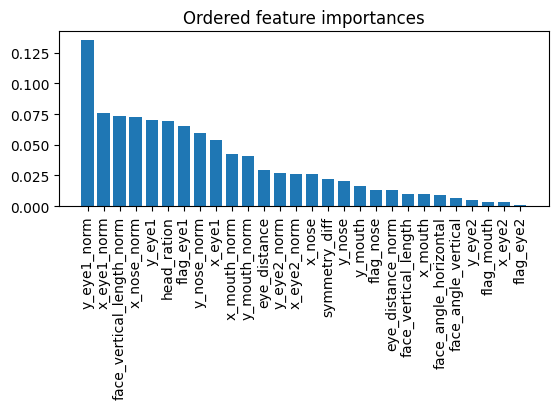

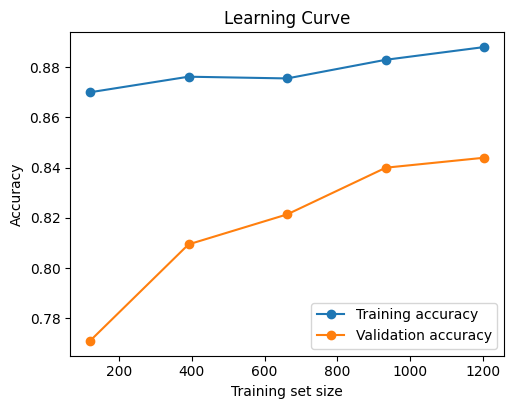


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.89      0.79      0.84       115
 baby_unsafe       0.88      0.94      0.91       187

    accuracy                           0.88       302
   macro avg       0.89      0.87      0.87       302
weighted avg       0.88      0.88      0.88       302

Confusion matrix---------------------------------------


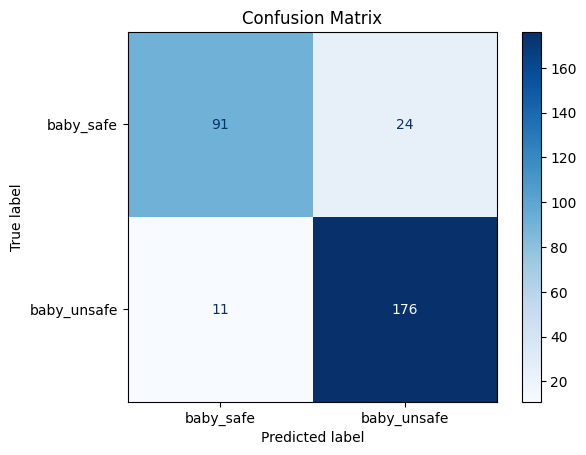

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


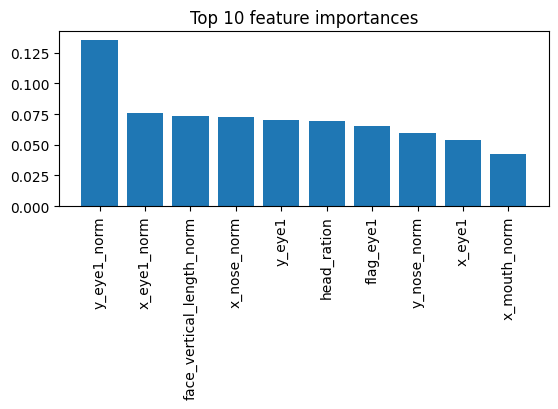

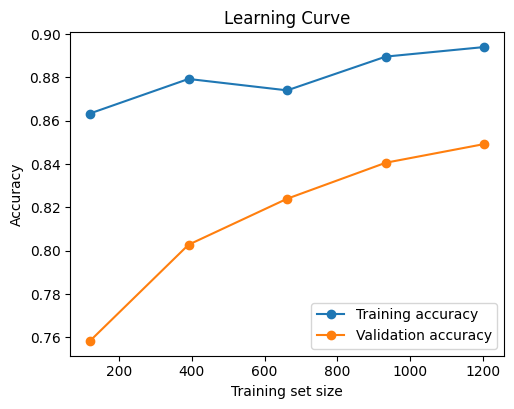


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.90      0.78      0.84       115
 baby_unsafe       0.88      0.95      0.91       187

    accuracy                           0.88       302
   macro avg       0.89      0.86      0.87       302
weighted avg       0.89      0.88      0.88       302

Confusion matrix---------------------------------------


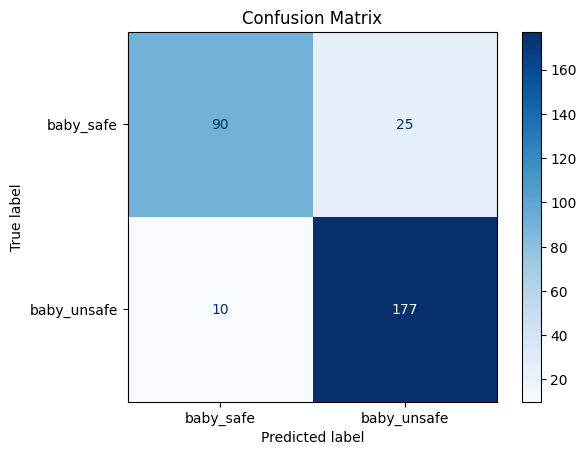

In [20]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs)
clf.random_forest()

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


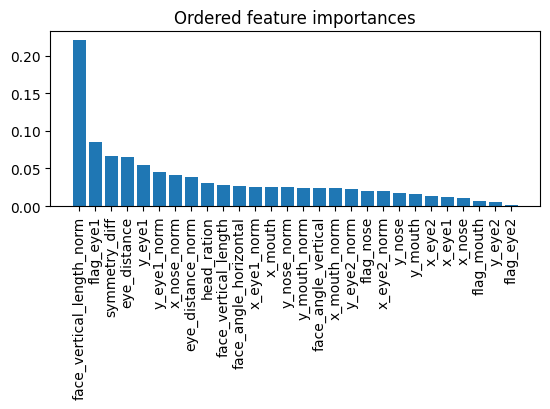

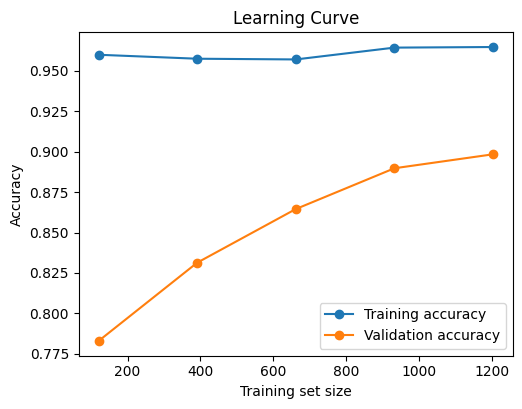


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.94      0.83      0.88       115
 baby_unsafe       0.91      0.97      0.94       187

    accuracy                           0.92       302
   macro avg       0.92      0.90      0.91       302
weighted avg       0.92      0.92      0.92       302

Confusion matrix---------------------------------------


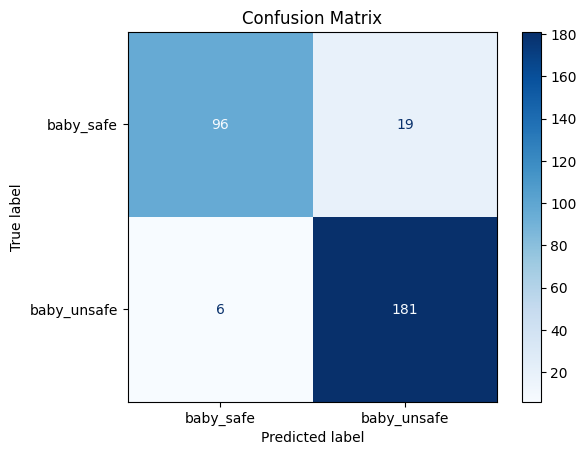

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


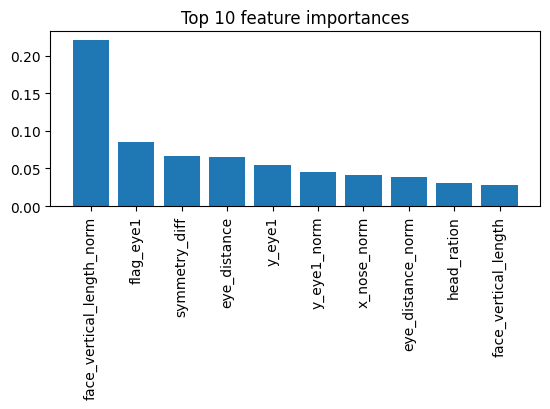

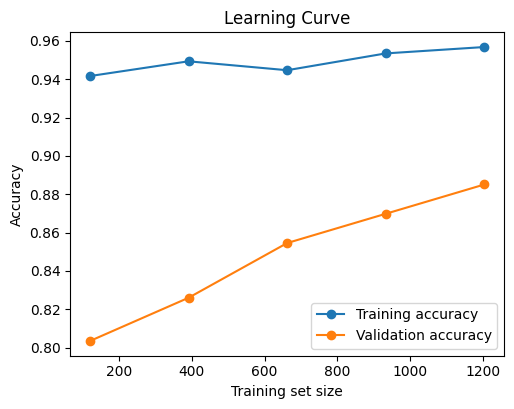


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.90      0.83      0.86       115
 baby_unsafe       0.90      0.94      0.92       187

    accuracy                           0.90       302
   macro avg       0.90      0.89      0.89       302
weighted avg       0.90      0.90      0.90       302

Confusion matrix---------------------------------------


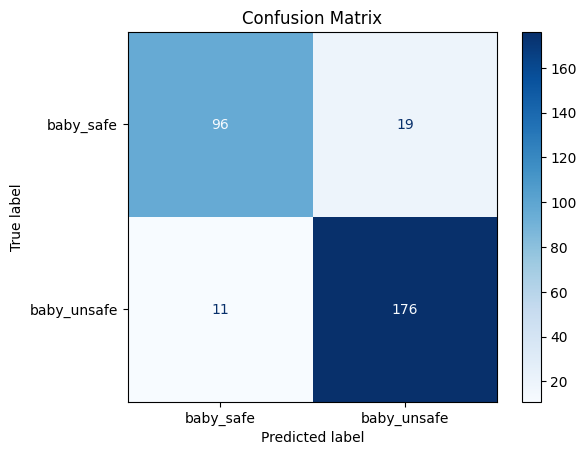

In [21]:
clf.XGBC()

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


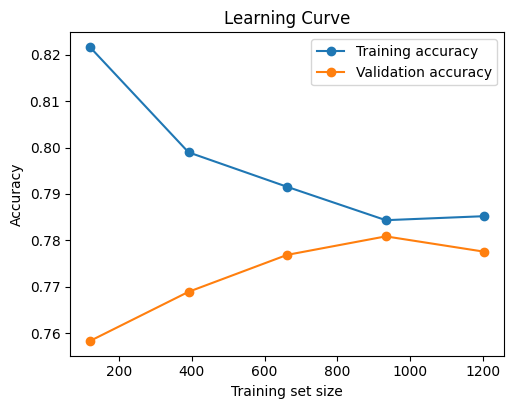


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.76      0.76      0.76       115
 baby_unsafe       0.85      0.86      0.85       187

    accuracy                           0.82       302
   macro avg       0.81      0.81      0.81       302
weighted avg       0.82      0.82      0.82       302

Confusion matrix---------------------------------------


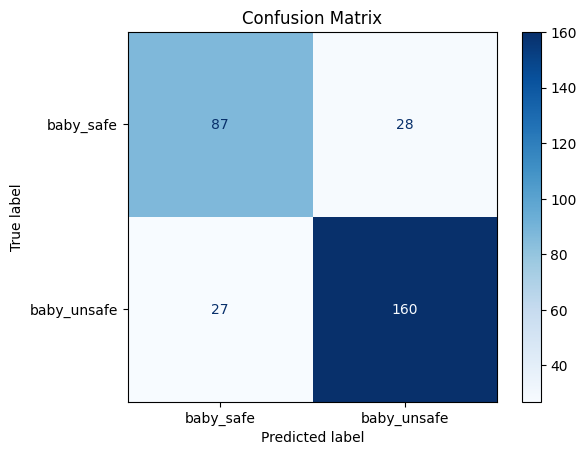

In [22]:
clf.logistic_regression()

## Save notebook

In [23]:
file_manager.save_as_pdf(ipynbname.path())

[NbConvertApp] Converting notebook /home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project/pipeline_terry/pipeline_dataset_v2.ipynb to pdf
[WARNING] Could not parse YAML metadata at line 7 column 1: not an object
[WARNING] Could not parse YAML metadata at line 7 column 1: not an object
[WARNING] Could not parse YAML metadata at line 7 column 1: not an object
[NbConvertApp] Support files will be in /home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project/pipeline_terry/reports/pipeline_dataset_v2(2025-08-24)_files/
[NbConvertApp] Writing 59477 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 974936 bytes to /home/terra/Documents/AI_eng